In [96]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from category_encoders import MEstimateEncoder


**TASK**

**Implement a linear regression model to predict the prices of houses.**

In [97]:
# Load dataset
data = pd.read_csv('../dataset/data.csv')
data.set_index("date", inplace=True)

data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [98]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9),

In [99]:
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


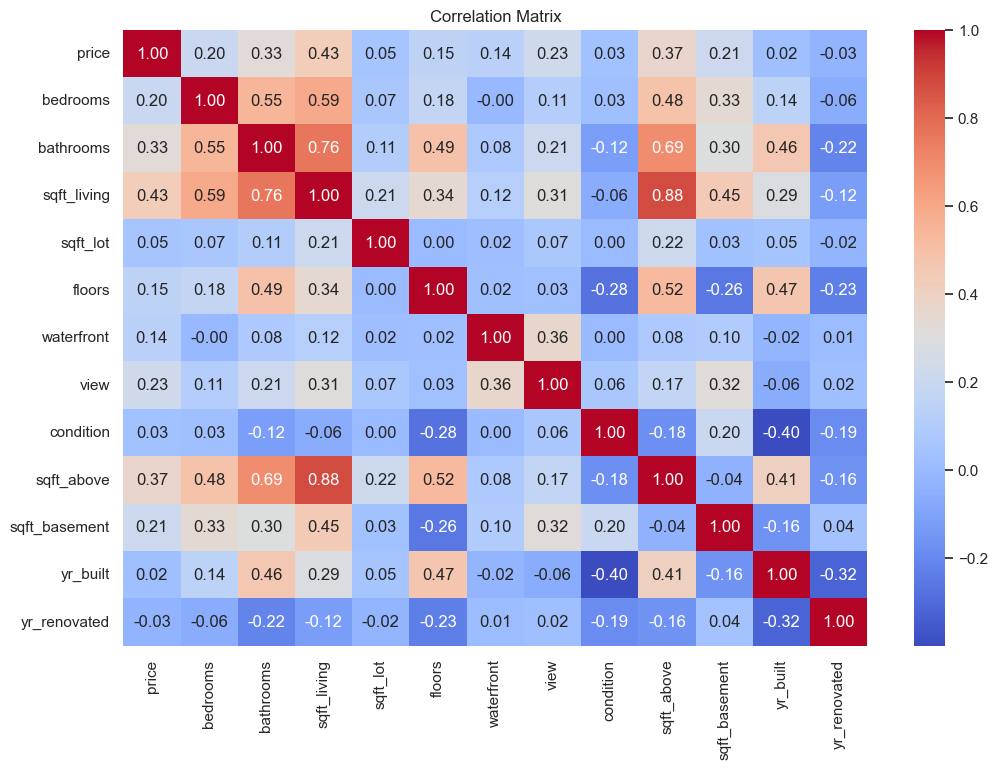

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


In [100]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = data[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values of all features with respect to 'Price'
print(corr_matrix['price'].sort_values(ascending=False))

From the above, it is evident that sqft_living, sqft_above and bathrooms are 

In [101]:

# 75th percentile
seventy_fifth = data["price"].quantile(0.75)

# 25th percentile
twenty_fifth = data["price"].quantile(0.25)

# Interquartile range
prices_iqr = seventy_fifth - twenty_fifth

# Upper threshold
upper = seventy_fifth + (1.5 * prices_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * prices_iqr)

data_mod = data[(data["price"] > lower) & (data["price"] < upper)]

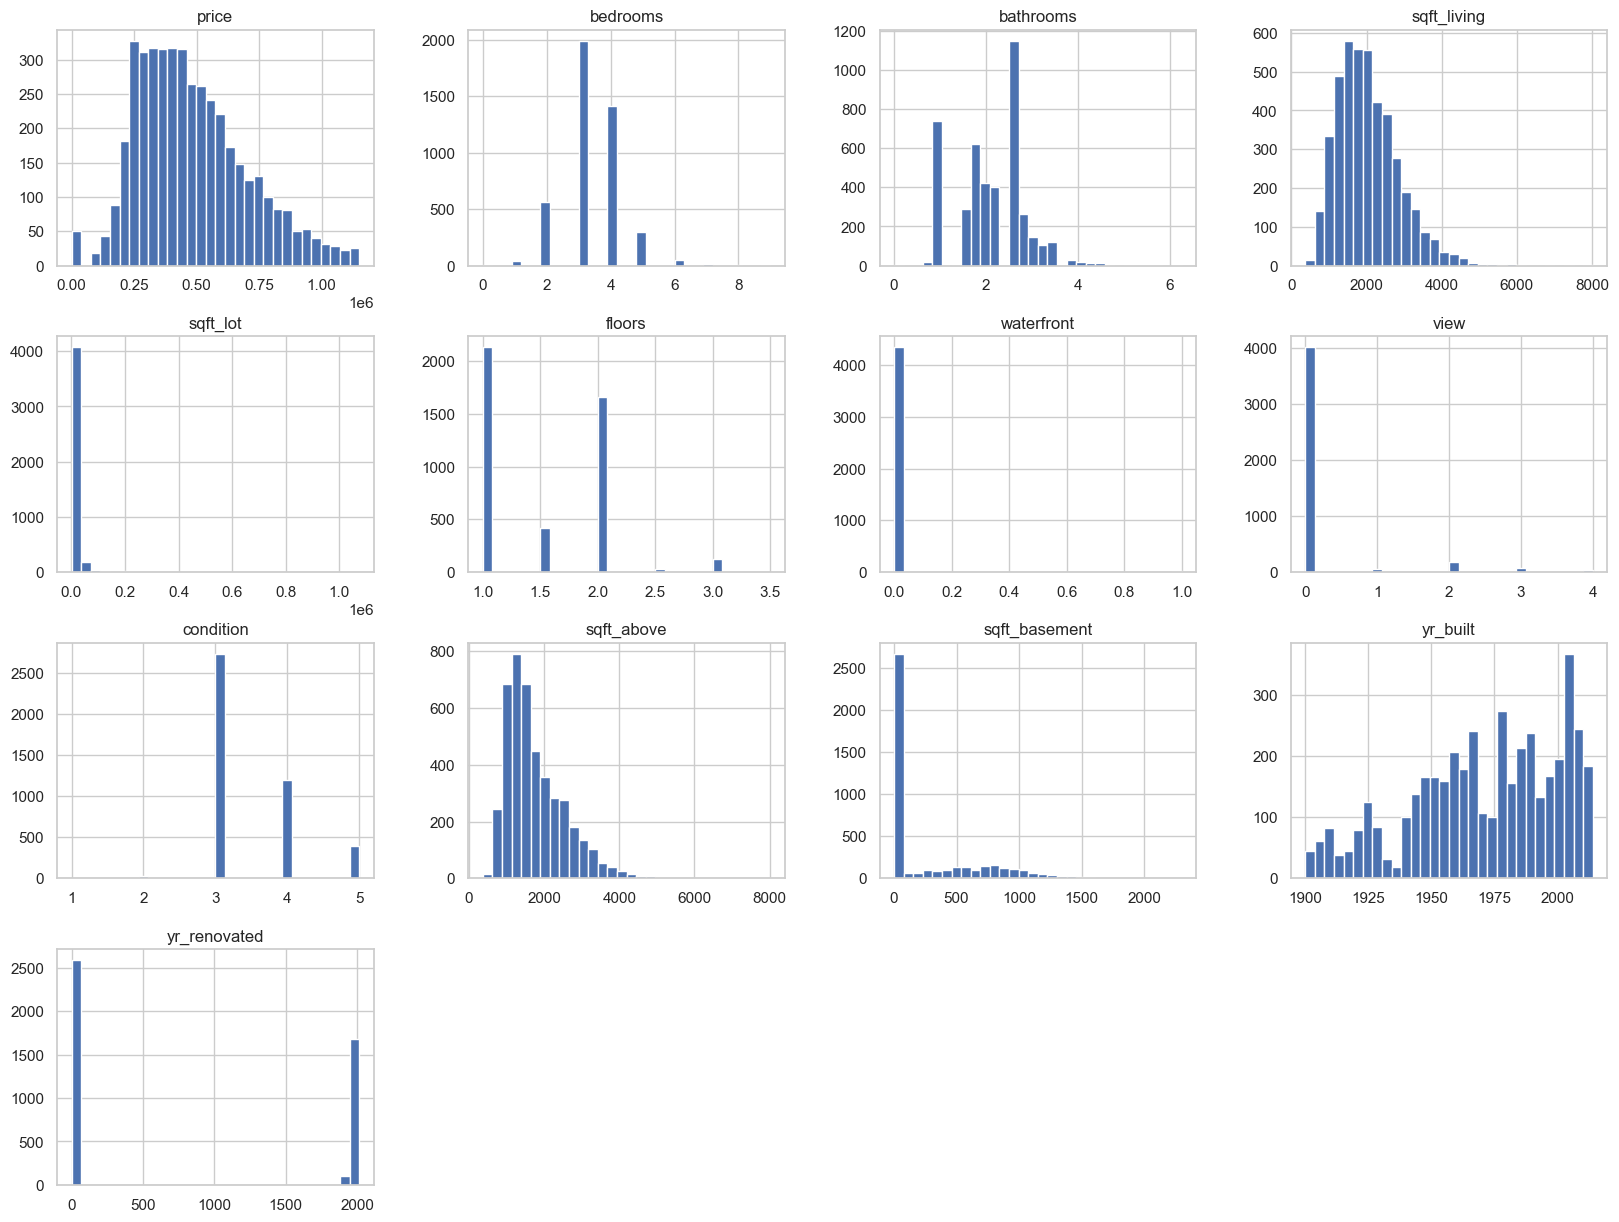

In [102]:
numeric_features = data_mod.select_dtypes(include=['number']).columns
data_mod[numeric_features].hist(bins=30, figsize=(20, 15))
plt.show()

In [103]:
data_mod.drop(columns=['country', 'yr_built'])

X = data_mod.drop(columns=["price"])
y = data_mod['price']

# Encode categorical variables
encoder = MEstimateEncoder(cols=['street', 'country', 'statezip', 'city'], m=0.5)
X = encoder.fit_transform(X, y)

# Scale data
scaler = StandardScaler() 
scaler.fit(X)

# Split data for modeling
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
# Initialize regression algorithm
model = LinearRegression()

# Fitting the data
model.fit(X_train,y_train) 

y_pred = model.predict(X_test)
test_acc = r2_score(y_test, y_pred)

# Relevant accuracy tests
print("Test accurcy: " + str(test_acc * 100))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - R^2 Score: {r2}')


Test accurcy: 99.79514465019871
Linear Regression - Mean Squared Error: 101500909.7470236
Linear Regression - R^2 Score: 0.9979514465019871


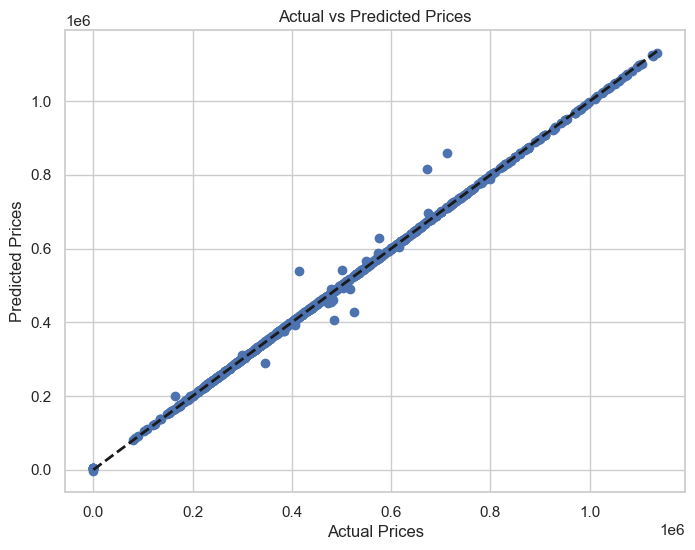

In [105]:
# Visualizing actual prices against predicted ones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
